In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# processing data
def clean_data(filename):
    df = pd.read_excel(filename,index=False)
    df.replace(r'', np.nan)
    cleaned_df = df[~pd.isnull(df).any(axis = 1)]
    return cleaned_df

def Dorcester_precincts(df):
    columns = df.columns.to_list()
    index = columns.index("Ward")
    
    data_array = df.to_numpy()
    
    rows = []
    for i in range(np.shape(data_array)[0]):
        current_p = str(int(data_array[i, index]))
        if len(current_p) == 4:
            if current_p[0:2] == '13' or current_p[0:2] == '15' or current_p[0:2] == '16' or current_p[0:2] == '17':
                rows.append(data_array[i].tolist())
    
    Dorcester_df = pd.DataFrame(np.asarray(rows), columns = df.columns)
    #Dorcester_df["Ward"] = Dorcester_df["Ward"].astype('Int64')
    return Dorcester_df

CC_all_yrs = clean_data("CC_turnout_all_years.xlsx")
df_2011 = clean_data("2011_CityCouncil_Results_Race_Turnout.xlsx")
df_2013 = clean_data("2013_CityCouncil_Race_Turnout_Results.xlsx")
df_2015 = clean_data("2015_city_council.xlsx")
df_2017 = clean_data("2017_CityCouncil_AtLarge_Turnout_Race.xlsx")
df_2019 = clean_data("2019_CityCouncil_Race Turnout.xlsx")
df_2011

Unnamed: 0  WILL DORCENA  AYANNA PRESSLEY  FELIX G ARROYO  \
0             0            16              113             111   
1             1             9               44              55   
2             2            40              133             155   
3             3             5               29              47   
4             4            12               54              67   
..          ...           ...              ...             ...   
248         248            16               71              88   
249         249            18               75              86   
250         250            32              123             126   
251         251            11               66              74   
252         252            22               60              79   

     JOHN R CONNOLLY  MICHAEL F FLAHERTY  STEPHEN J MURPHY  SEAN H RYAN  \
0                117                 100                99           24   
1                 42                  70                52           10   
2                123                 101               109           34   
3                 40                  45                43            8   
4                 63                  69                63           11   
..               ...                 ...               ...          ...   
248               90                  75                72           18   
249               75                  60                55           17   
250              112                  99               119           30   
251               84                  52                77           12   
252               79                  86                75           23   

     WILLIAM B FEEGBEH Write-in  DESHON PORTER Write-in  ...  \
0                             0                       0  ...   
1                             0                       0  ...   
2                             0                       0  ...   
3                             0                       0  ...   
4                             0                       0  ...   
..                          ...                     ...  ...   
248                           0                       0  ...   
249                           0                       0  ...   
250                           0                       0  ...   
251                           0                       0  ...   
252                           0                       0  ...   

     Asian Percentage  Native Hawaiian/Pacific Islander Percentage  \
0            2.853815                                     0.232964   
1            2.028006                                     0.000000   
2            7.172067                                     0.000000   
3            2.016985                                     0.053079   
4            2.631579                                     0.173130   
..                ...                                          ...   
248         17.288136                                     0.000000   
249         15.807730                                     0.099108   
250         10.237510                                     0.000000   
251         11.787072                                     0.000000   
252         14.702309                                     0.060753   

     Other Race Percentage  Two or more races Percentage  Hispanic Percentage  \
0                10.075713                      3.494467            29.295282   
1                16.948334                      4.538870            51.810719   
2                15.539478                      5.662158            41.333753   
3                29.458599                      6.581741            63.853503   
4                31.024931                      5.297784            57.617729   
..                     ...                           ...                  ...   
248               1.259080                      1.791768             5.230024   
249               1.635282                      2.973

In [2]:
def get_turnout(df):
    df['Turnout'] = round(df['BALLOTS CAST']/df['Registered Voters'],2)
    return df

def processing(df):
    conditions = [df['Black Percentage'] >= 50,  df['White Percentage'] >= 50]
    choices = ['black', 'white']
    df['majority_race'] = np.select(conditions, choices, "POC")
    return df[["Ward", 'majority_race', 'Turnout']]

In [3]:
df_2011 = processing(get_turnout(df_2011))
df_2011 = df_2011.rename(columns={"Turnout": "Turnout_2011"})

df_2013 = processing(get_turnout(df_2013))
df_2013 = df_2013.rename(columns={"Turnout": "Turnout_2013"})

df_2015 = processing(get_turnout(df_2015))
df_2015 = df_2015.rename(columns={"Turnout": "Turnout_2015"})

df_2017 = df_2017.rename(columns={"Ward_Precinct": "Ward"})
df_2017 = processing(get_turnout(df_2017))
df_2017 = df_2017.rename(columns={"Turnout": "Turnout_2017"})

df_2019 = df_2019.drop('Ward', axis=1)
df_2019 = df_2019.rename(columns={"Ward_Precinct_Code": "Ward"})
df_2019 = processing(df_2019)
df_2019 = df_2019.rename(columns={"Turnout": "Turnout_2019"})
df_2019['Turnout_2019'] = round(df_2019['Turnout_2019'], 2)

In [4]:
df_2019['Ward'] = df_2019.Ward.astype(int)

df_2019

Ward majority_race  Turnout_2019
0     505         white          0.22
1     503         white          0.16
2     506         white          0.10
3     308           POC          0.10
4    2106         white          0.06
..    ...           ...           ...
249   702         white          0.05
250   609         white          0.04
251   701         white          0.06
252  1609         white          0.07
253  1612         white          0.09

[252 rows x 3 columns]

In [5]:
df_final = df_2011.merge(df_2013,on=['Ward','majority_race']).merge(df_2015,on=['Ward','majority_race']).merge(df_2017,on=['Ward','majority_race']).merge(df_2019,on=['Ward','majority_race'])

In [6]:
df_final

Ward majority_race  Turnout_2011  Turnout_2013  Turnout_2015  \
0     101         white          0.19          0.52          0.14   
1     102         white          0.15          0.45          0.11   
2     103         white          0.16          0.44          0.13   
3     104         white          0.18          0.44          0.09   
4     105         white          0.14          0.43          0.08   
..    ...           ...           ...           ...           ...   
247  2208         white          0.12          0.32          0.09   
248  2209         white          0.10          0.27          0.08   
249  2210         white          0.14          0.36          0.11   
250  2211         white          0.13          0.34          0.11   
251  2212         white          0.16          0.32          0.12   

     Turnout_2017  Turnout_2019  
0            0.35          0.10  
1            0.29          0.04  
2            0.30          0.07  
3            0.29          0.04  
4            0.28          0.03  
..            ...           ...  
247          0.23          0.07  
248          0.21          0.08  
249          0.27          0.10  
250          0.25          0.12  
251          0.24          0.09  

[252 rows x 7 columns]

Text(0.5, 0.98, 'CC 2011')

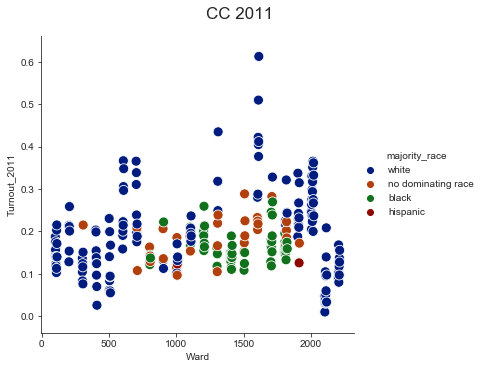

In [17]:
sns.set_style("ticks")

g = sns.relplot(data=df_final, x="Ward", y="Turnout_2011", hue="majority_race",palette="dark", kind='scatter', s=100)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('CC 2011',fontsize=17)
#g.legend.set_title("Precints Won")
#g.set(xticks=np.arange(1,23,2))
#g.axes[0][0].axhline(50, ls='--')

Text(0.5, 0.98, 'CC 2013')

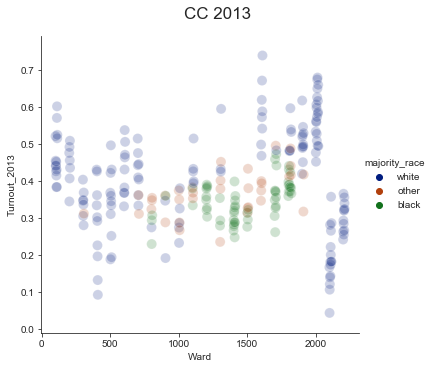

In [44]:
g = sns.relplot(data=df_final, x="Ward", y="Turnout_2013", hue="majority_race",palette="dark", kind='scatter', s=100,alpha=.2)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('CC 2013',fontsize=17)
#g.legend.set_title("Precints Won")

Text(0.5, 0.98, 'CC 2015')

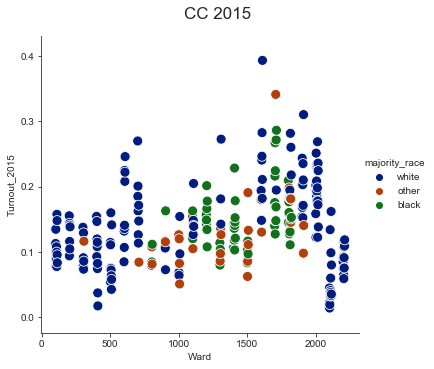

In [30]:
g = sns.relplot(data=df_final, x="Ward", y="Turnout_2015", hue="majority_race",palette="dark", kind='scatter', s=100)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('CC 2015',fontsize=17)

Text(0.5, 0.98, 'CC 2017')

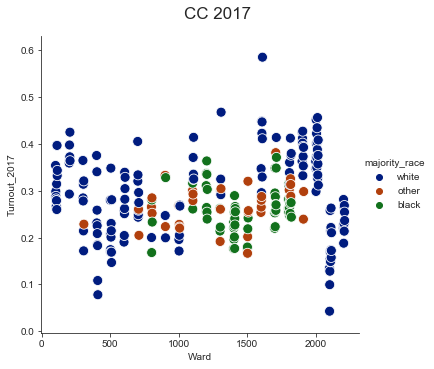

In [31]:
g = sns.relplot(data=df_final, x="Ward", y="Turnout_2017", hue="majority_race",palette="dark", kind='scatter', s=100)
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('CC 2017',fontsize=17)

In [7]:
df_final_long = pd.melt(df_final, id_vars=['Ward','majority_race'], value_vars=['Turnout_2011',
                                                                               'Turnout_2013',
                                                                               'Turnout_2015',
                                                                               'Turnout_2017',
                                                                               'Turnout_2019'])
df_final_long

Ward majority_race      variable     value
0      101         white  Turnout_2011  0.186715
1      102         white  Turnout_2011  0.145342
2      103         white  Turnout_2011  0.156431
3      104         white  Turnout_2011  0.175182
4      105         white  Turnout_2011  0.140314
...    ...           ...           ...       ...
1255  2208         white  Turnout_2019  0.070218
1256  2209         white  Turnout_2019  0.079782
1257  2210         white  Turnout_2019  0.099509
1258  2211         white  Turnout_2019  0.119392
1259  2212         white  Turnout_2019  0.094168

[1260 rows x 4 columns]

Text(0.5, 0.98, 'CC turnouts 2011-19 by ward/precinct')

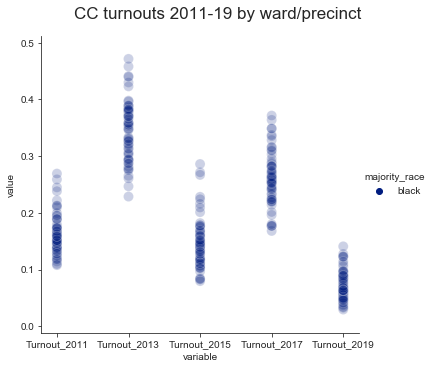

In [46]:
g = sns.relplot(data=df_final_long[df_final_long['majority_race']=='black'], x="variable", y="value", hue="majority_race",palette="dark", kind='scatter', s=100,alpha=.2 )
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('CC turnouts 2011-19 by ward/precinct',fontsize=17)

Text(0.5, 0.98, 'CC turnouts 2011-19 by ward/precinct')

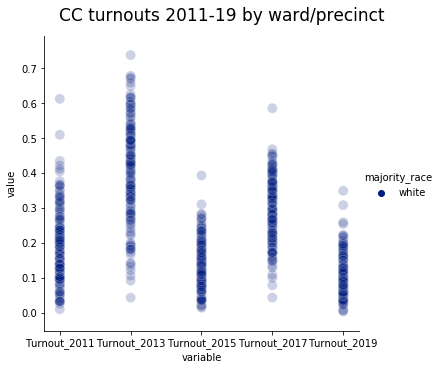

In [8]:
g = sns.relplot(data=df_final_long[df_final_long['majority_race']=='white'], x="variable", y="value", hue="majority_race",palette="dark", kind='scatter', s=100,alpha=.2 )
g.fig.subplots_adjust(top=0.9) # adjust the Figure in g
g.fig.suptitle('CC turnouts 2011-19 by ward/precinct',fontsize=17)